<a href="https://colab.research.google.com/github/ebrahimpichka/cats_vs_dogs/blob/main/Cats_vs_Dogs_Keras_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cats vs. Dogs image classification using Convolution Neural Networks with Keras**

In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

downloading cats vs. dogs dataset

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"


--2021-02-16 18:55:17--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.53.252.195, 2600:1409:12:285::e59, 2600:1409:12:2af::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.53.252.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  97.3MB/s    in 8.3s    

2021-02-16 18:55:26 (95.1 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
!unzip /tmp/cats-and-dogs.zip

## Preprocessing and splitting images

making  train and validation directories to split the data

In [4]:
os.mkdir('./cats-v-dogs')
os.mkdir(os.path.join('./cats-v-dogs','training'))
os.mkdir(os.path.join('./cats-v-dogs','testing'))
os.mkdir(os.path.join('./cats-v-dogs/training','cats'))
os.mkdir(os.path.join('./cats-v-dogs/testing','cats'))
os.mkdir(os.path.join('./cats-v-dogs/training','dogs'))
os.mkdir(os.path.join('./cats-v-dogs/testing','dogs'))

In [5]:
# train/dev split function

def split_data(SOURCE_PATH, TRAIN_PATH, TEST_PATH, TRAIN_SIZE):

    items = os.listdir(SOURCE_PATH)           # getting image names data
    items = random.sample(items, len(items))  # shuffling data

    cutoff = int(TRAIN_SIZE*len(items))       # split cutoff

    for item in items[:cutoff]:
        if os.path.getsize(os.path.join(SOURCE_PATH,item)) != 0:
            copyfile(os.path.join(SOURCE_PATH,item), os.path.join(TRAIN_PATH,item))

    for item in items[cutoff:]:
        if os.path.getsize(os.path.join(SOURCE_PATH,item)) != 0:
            copyfile(os.path.join(SOURCE_PATH,item), os.path.join(TEST_PATH,item))

In [6]:
train_size = .9

CAT_SOURCE_DIR = "./PetImages/Cat/"
TRAINING_CATS_DIR = "./cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "./cats-v-dogs/testing/cats/"

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, train_size)

# ----------------

DOG_SOURCE_DIR = "./PetImages/Dog/"
TRAINING_DOGS_DIR = "./cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "./cats-v-dogs/testing/dogs/"

split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, train_size)

In [7]:
print('num of train cat images = ',len(os.listdir('./cats-v-dogs/training/cats/')))
print('num of train dog images = ',len(os.listdir('./cats-v-dogs/training/dogs/')))
print('num of test  cat images = ',len(os.listdir('./cats-v-dogs/testing/cats/')))
print('num of test  dig images = ',len(os.listdir('./cats-v-dogs/testing/dogs/')))

num of train cat images =  11249
num of train dog images =  11249
num of test  cat images =  1251
num of test  dig images =  1251


## Definig and compiling the model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3),activation='relu' ,input_shape=(150,150,3),padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3,3) ,activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3,3) ,activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3,3) ,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3,3) ,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

**model architecture:**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       5

In [10]:
train_data_path = './cats-v-dogs/training/'
val_data_path = './cats-v-dogs/testing/'



train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    batch_size=32,
                                                    class_mode  = 'binary',
                                                    target_size = (150, 150))


validation_generator = validation_datagen.flow_from_directory(val_data_path,
                                                    batch_size=32,
                                                    class_mode  = 'binary',
                                                    target_size = (150, 150))

Found 22497 images belonging to 2 classes.
Found 2501 images belonging to 2 classes.


## Training

Now we fit the Model in 20 epochs ...

In [12]:
EPOCHS = 20

history = model.fit(train_generator,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
704/704 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5023

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

704/704 [==============================] - 97s 126ms/step - loss: 0.6948 - accuracy: 0.5023 - val_loss: 0.7229 - val_accuracy: 0.5482
Epoch 2/20
704/704 [==============================] - 88s 125ms/step - loss: 0.6451 - accuracy: 0.6235 - val_loss: 0.5560 - val_accuracy: 0.7205
Epoch 3/20
704/704 [==============================] - 88s 124ms/step - loss: 0.5127 - accuracy: 0.7515 - val_loss: 0.4565 - val_accuracy: 0.8077
Epoch 4/20
704/704 [==============================] - 87s 124ms/step - loss: 0.3965 - accuracy: 0.8226 - val_loss: 0.3476 - val_accuracy: 0.8473
Epoch 5/20
704/704 [==============================] - 88s 125ms/step - loss: 0.3083 - accuracy: 0.8692 - val_loss: 0.2962 - val_accuracy: 0.8745
Epoch 6/20
704/704 [==============================] - 88s 125ms/step - loss: 0.2381 - accuracy: 0.8997 - val_loss: 0.2789 - val_accuracy: 0.8892
Epoch 7/20
704/704 [==============================] - 88s 125ms/step - loss: 0.1876 - accuracy: 0.9245 - val_loss: 0.3232 - val_accuracy: 0.8

We got %90 accuracy on validation set

In [14]:
model.save('cats_vs_dogs.h5')

## Analyzing model loss

now we plot the loss of training and validation set

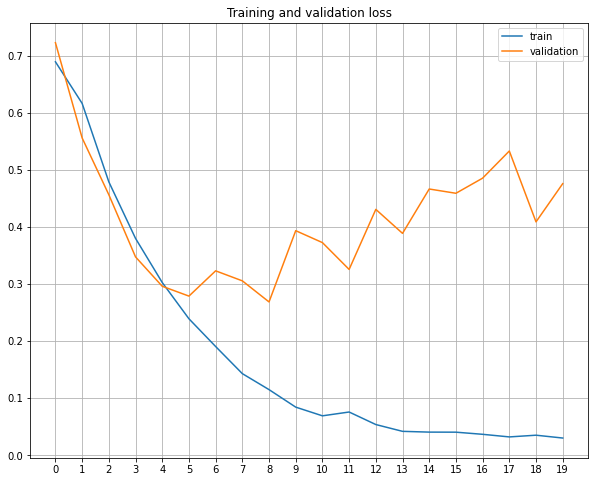

In [21]:
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(EPOCHS)

plt.figure(figsize=(10, 8))
plt.plot  ( epochs, loss ,label = 'train')
plt.plot  ( epochs, val_loss,label = 'validation' )
plt.title ('Training and validation loss'  )
plt.xticks(list(range(EPOCHS)))
plt.grid()
plt.legend()

Looks like we startet overfitting on the trainig set afte 8th epoch

now Let's check the model's performance on some random internet images of cats and dogs

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for name in uploaded.keys():
 
  # predicting images
  path='/content/' + name
  img = image.load_img(path, target_size=(150, 150))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=6)
  
  print(classes[0])
  
  if classes[0]>0:
    print(name + " is a dog")
    
  else:
    print(name + " is a cat")

Saving cat_1.jpg to cat_1.jpg
Saving cat_2.jfif to cat_2 (1).jfif
Saving cat_3.jfif to cat_3.jfif
Saving dog_1.jfif to dog_1 (1).jfif
Saving dog_2.jfif to dog_2 (1).jfif
Saving dog_3.jfif to dog_3 (1).jfif
[1.]
cat_1.jpg is a dog
[0.]
cat_2.jfif is a cat
[0.]
cat_3.jfif is a cat
[1.]
dog_1.jfif is a dog
[1.]
dog_2.jfif is a dog
[1.]
dog_3.jfif is a dog


model got the first image wrong

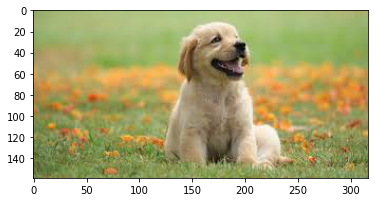

In [26]:
img = mpimg.imread('/content/dog_1 (1).jfif')
plt.imshow(img)
plt.show()